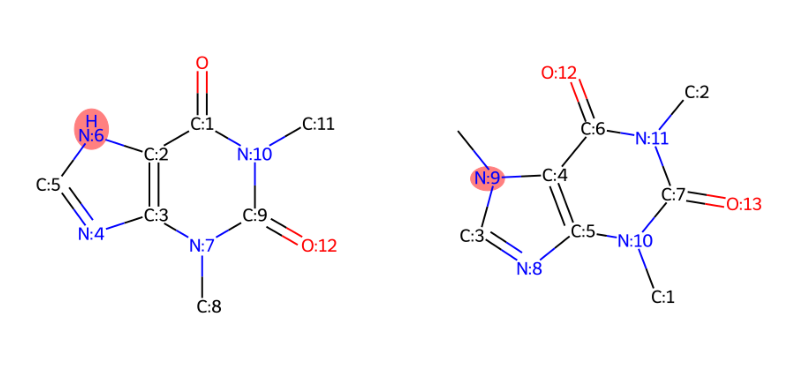

In [23]:
import modifinder.utilities.mol_utils as mf_mu
import modifinder.utilities.visualizer as mf_vis
from matplotlib import pyplot as plt
from rdkit import Chem
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
mol1 = mol_with_atom_index(Chem.MolFromSmiles("O=C1C2=C(N=CN2)N(C)C(N1C)=O"))
mol2 = mol_with_atom_index(Chem.MolFromInchi("InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)8(14)11(6)2/h4H,1-3H3"))
edit_in_mol1 = mf_mu.get_modification_nodes(mol1, mol2, True)
edit_in_mol2 = mf_mu.get_modification_nodes(mol1, mol2, False)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mf_vis.draw_molecule(mol1, highlightAtoms=edit_in_mol1))
ax[1].imshow(mf_vis.draw_molecule(mol2, highlightAtoms=edit_in_mol2))
for i in range(2):
    ax[i].axis("off")
plt.show()

fig.savefig('../_static/get_modification_nodes.png')

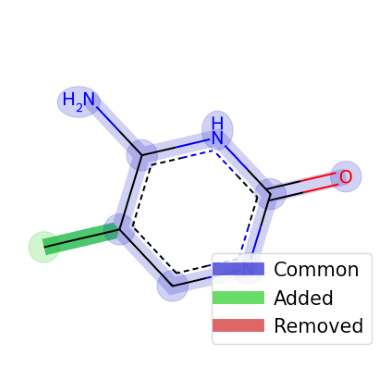

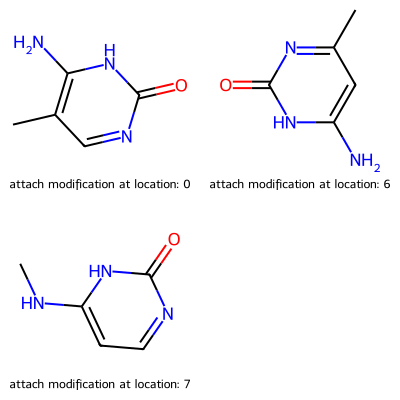

AttributeError: 'Image' object has no attribute 'save'

In [ ]:
import modifinder.utilities.mol_utils as mf_mu
import modifinder.utilities.visualizer as mf_vis
from matplotlib import pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw
modification = Chem.MolFromSmiles("C1=C(NC(=O)N=C1)N")
mol1 = Chem.MolFromSmiles("CC1=C(NC(=O)N=C1)N")
res = mf_mu.generate_possible_stuctures(mol1, modification)
img = mf_vis.draw_modifications(modification, mol1)
plt.imshow(img)
plt.axis("off")
plt.show()
res_mols = [x[1] for x in res]
res_index = ["attach modification at location: " + str(x[0]) for x in res]
img2 = Draw.MolsToGridImage(res_mols, molsPerRow=2, subImgSize=(200, 200), legends=res_index, returnPNG=False)
display(img2)

plt.imsave('../_static/generate_possible_stuctures1.png', img)
# Write the image to a file
img2.save('../_static/generate_possible_stuctures2.png')



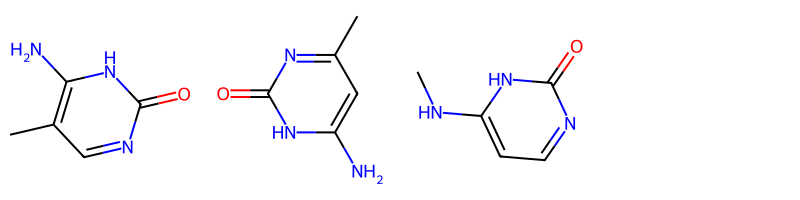

In [6]:
img

In [3]:
res

[(0, <rdkit.Chem.rdchem.Mol at 0x7a5750cdf120>),
 (6, <rdkit.Chem.rdchem.Mol at 0x7a5750cdf200>),
 (7, <rdkit.Chem.rdchem.Mol at 0x7a5750cdf270>)]

In [30]:
all_modifications = mf_mu.get_modification_graph(mol1, modification)
wild_atom = list(all_modifications[0][1].keys())[0]
neighbor = all_modifications[0][0].GetAtomWithIdx(wild_atom).GetNeighbors()[0]
bondType = all_modifications[0][0].GetBondBetweenAtoms(wild_atom, neighbor.GetIdx()).GetBondType()
all_modifications[0][0].RemoveAtom(wild_atom)


In [36]:
frag = all_modifications[0][0]
index_in_frag = neighbor.GetIdx()

In [40]:
structs = []
for atom in modification.GetAtoms():
    temp_struct = mf_mu._attach_struct_try(modification, frag, atom.GetIdx(), index_in_frag, bondType)
    if temp_struct is None:
        continue
    structs.append((atom.GetIdx(), temp_struct))

In [41]:
structs

[(0, <rdkit.Chem.rdchem.Mol at 0x72069e6c22e0>),
 (6, <rdkit.Chem.rdchem.Mol at 0x72069e6c2820>),
 (7, <rdkit.Chem.rdchem.Mol at 0x72069e6c25f0>)]

In [33]:
bondType

rdkit.Chem.rdchem.BondType.SINGLE

In [29]:
all_modifications

[(<rdkit.Chem.rdchem.RWMol at 0x72069e76c450>, {1: '1'}, '[#6]-[#0]')]